## Import Libraries

In [6]:
# Data manipulation
import pandas as pd
import pandas_profiling
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.style as style
style.use('ggplot')

import seaborn as sns
sns.set(style='white', context='notebook', color_codes=True) 
sns.set_context('talk') # Set defaults for graphs

# Set options
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 10000)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

# Set today's date
import datetime as dt
today = dt.datetime.today().strftime("%Y.%m.%d")

## Load and Inspect Structure

In [7]:
Staff = pd.read_csv('data.csv')
Staff.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.50,2011,1,0,41,No,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.50,2015,0,0,52,Yes,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.50,2012,0,0,42,Yes,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.50,2009,0,0,42,Yes,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.50,2012,0,0,77,Yes,No,No,1,0


In [8]:
Staff.tail()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
38307,YAK/S/54802,Information Technology and Solution Support,First Degree or HND,Female,Direct Internal process,2,1990,0.00,2018,0,0,70,Yes,No,No,0,0
38308,YAK/S/54805,Customer Support and Field Operations,"MSc, MBA and PhD",Female,Agency and others,2,1984,5.00,2013,0,0,48,Yes,No,No,1,0
38309,YAK/S/54806,Information and Strategy,First Degree or HND,Male,Agency and others,2,1994,12.50,2016,1,0,71,No,No,No,3,0
38310,YAK/S/54807,Commercial Sales and Marketing,NaN,Male,Direct Internal process,2,1992,2.50,2017,0,0,37,Yes,No,No,1,0
38311,YAK/S/54808,People/HR Management,First Degree or HND,Male,Agency and others,2,1994,2.50,2014,0,0,41,Yes,No,No,2,0


In [9]:
Staff.columns.values.tolist()

['EmployeeNo',
 'Division',
 'Qualification',
 'Gender',
 'Channel_of_Recruitment',
 'Trainings_Attended',
 'Year_of_birth',
 'Last_performance_score',
 'Year_of_recruitment',
 'Targets_met',
 'Previous_Award',
 'Training_score_average',
 'Foreign_schooled',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement',
 'No_of_previous_employers',
 'Promoted_or_Not']

In [10]:
Staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 17 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
Foreign_schooled                       38312 non-null object
Past_Disciplinary_Action               38312 non-null object
Previous_IntraDepartmental_Movement    383

In [11]:
Staff.shape

(38312, 17)

In [12]:
Staff.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Trainings_Attended,38312.00,2.25,0.61,2.00,2.00,2.00,2.00,11.00
Year_of_birth,38312.00,1986.21,7.65,1950.00,1982.00,1988.00,1992.00,2001.00
Last_performance_score,38312.00,7.70,3.74,0.00,5.00,7.50,10.00,12.50
Year_of_recruitment,38312.00,2013.14,4.26,1982.00,2012.00,2014.00,2016.00,2018.00
Targets_met,38312.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
Previous_Award,38312.00,0.02,0.15,0.00,0.00,0.00,0.00,1.00
Training_score_average,38312.00,55.37,13.36,31.00,43.00,52.00,68.00,91.00
Promoted_or_Not,38312.00,0.08,0.28,0.00,0.00,0.00,0.00,1.00


In [13]:
Profile = pandas_profiling.ProfileReport(Staff)
Profile.to_file(outputfile = 'Staff_Report.html')

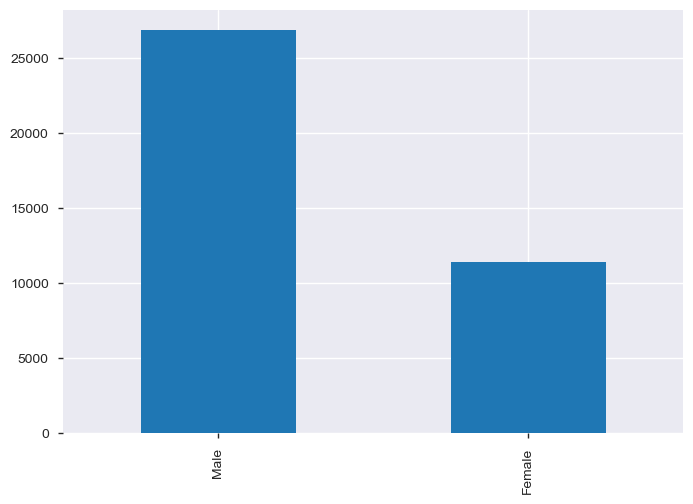

In [14]:
Staff['Gender'].value_counts().plot('bar')

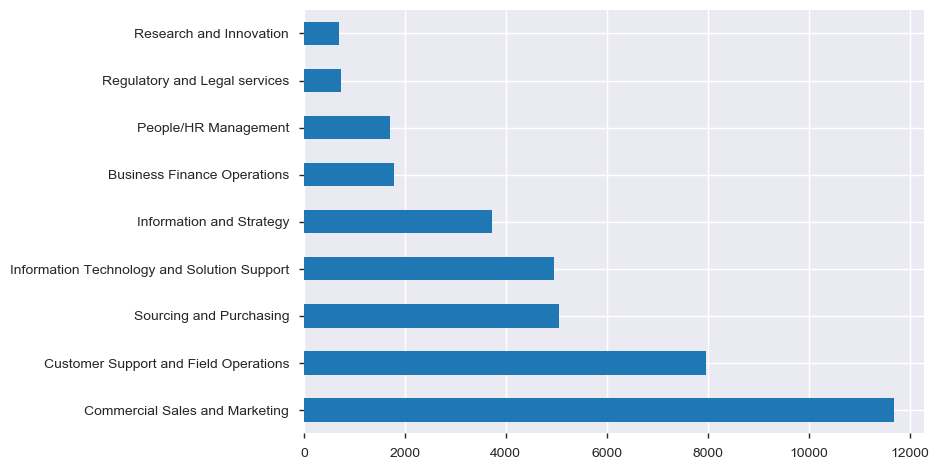

In [15]:
Staff['Division'].value_counts().plot('barh')

In [16]:
Staff['Qualification'].value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

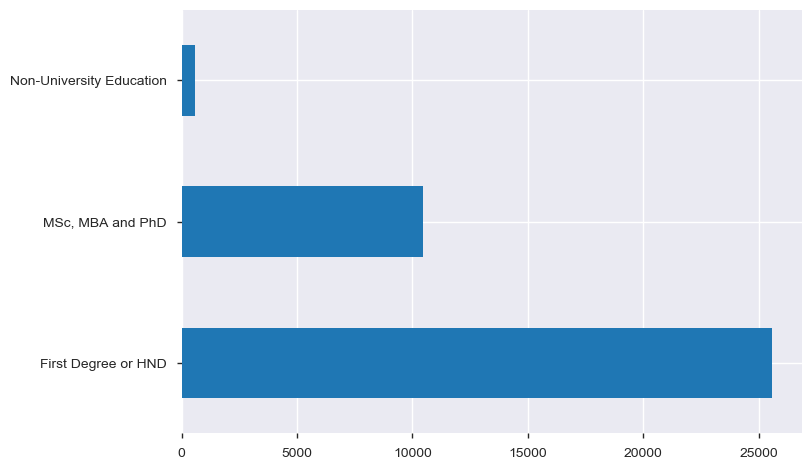

In [17]:
Staff['Qualification'].value_counts().plot('barh')

In [18]:
# Percentage of 'Promoted_or_Not'
Percent_Promote = Staff['Promoted_or_Not'].value_counts() / len(Staff)*100
Percent_Promote

0   91.54
1    8.46
Name: Promoted_or_Not, dtype: float64

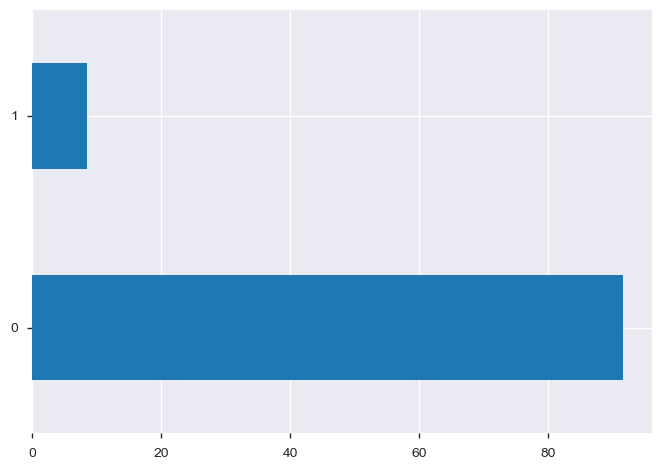

In [19]:
Percent_Promote.plot('barh')

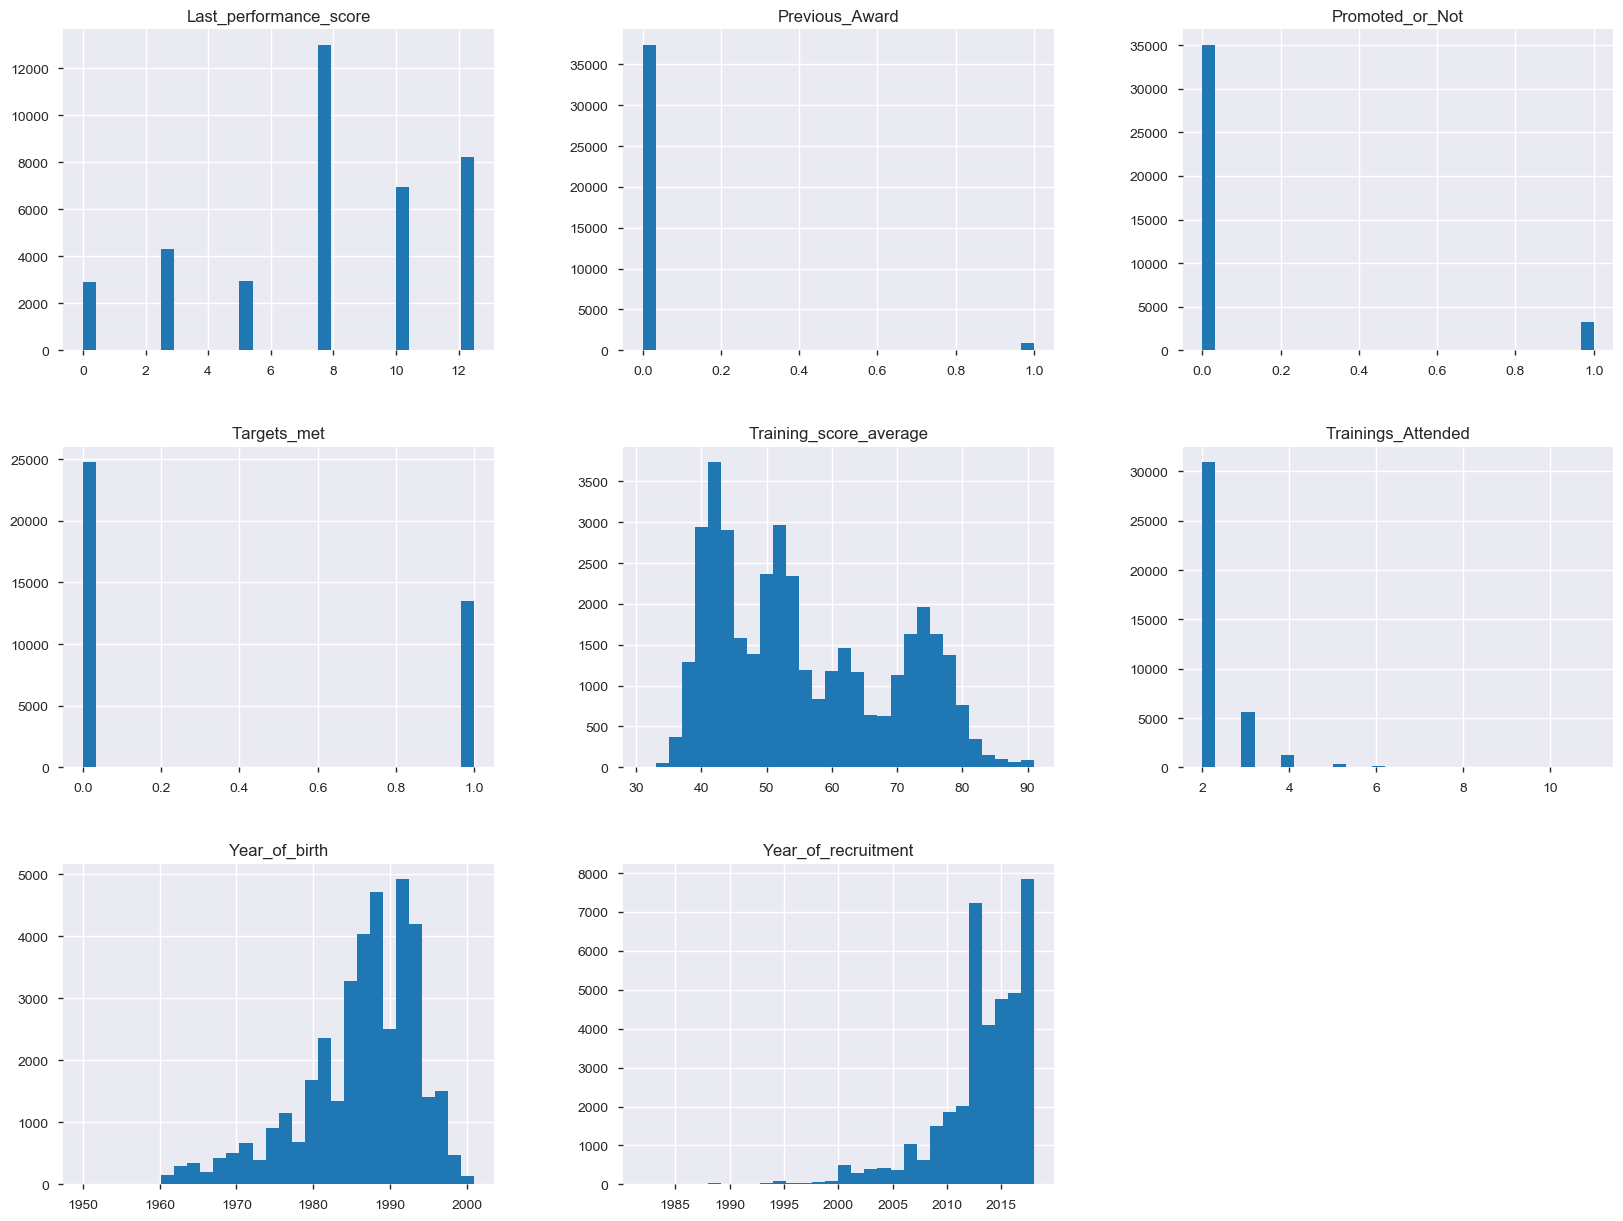

In [20]:
Staff.hist(bins = 30, figsize = (20, 15))

plt.show()

In [29]:
Staff_Numeric_Var = Staff._get_numeric_data()
Numeric_Data = Staff_Numeric_Var.columns.drop(['Promoted_or_Not', 'Year_of_birth', 'Targets_met', 'Previous_Award']).tolist()
Numeric_Data

['Trainings_Attended',
 'Last_performance_score',
 'Year_of_recruitment',
 'Training_score_average']

In [23]:
Staff.corr()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
Trainings_Attended,1.00,0.08,-0.06,0.06,-0.04,-0.01,0.04,-0.02
Year_of_birth,0.08,1.00,-0.18,0.65,0.03,0.01,0.05,0.02
Last_performance_score,-0.06,-0.18,1.00,-0.19,0.28,0.03,0.06,0.12
Year_of_recruitment,0.06,0.65,-0.19,1.00,0.08,0.04,0.04,0.01
Targets_met,-0.04,0.03,0.28,0.08,1.00,0.09,0.08,0.22
Previous_Award,-0.01,0.01,0.03,0.04,0.09,1.00,0.07,0.20
Training_score_average,0.04,0.05,0.06,0.04,0.08,0.07,1.00,0.18
Promoted_or_Not,-0.02,0.02,0.12,0.01,0.22,0.20,0.18,1.00


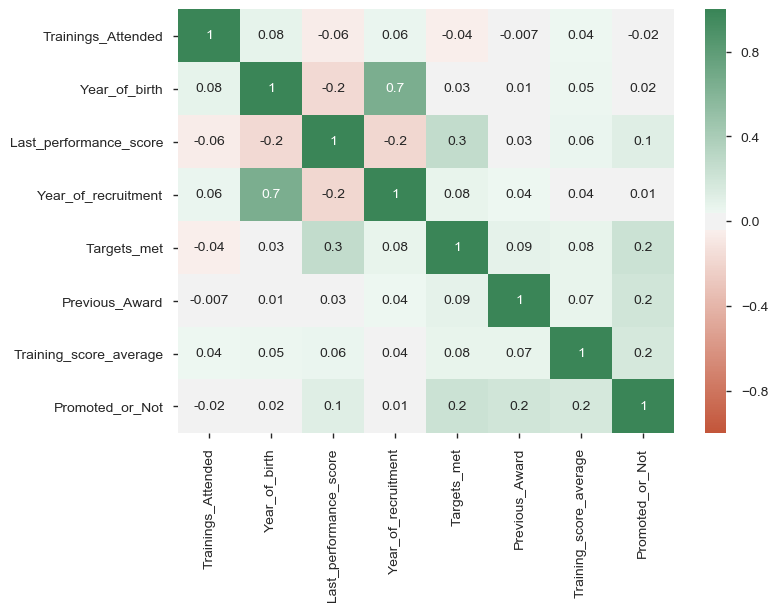

In [24]:
sns.heatmap(Staff.corr(), annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 500, as_cmap = True))

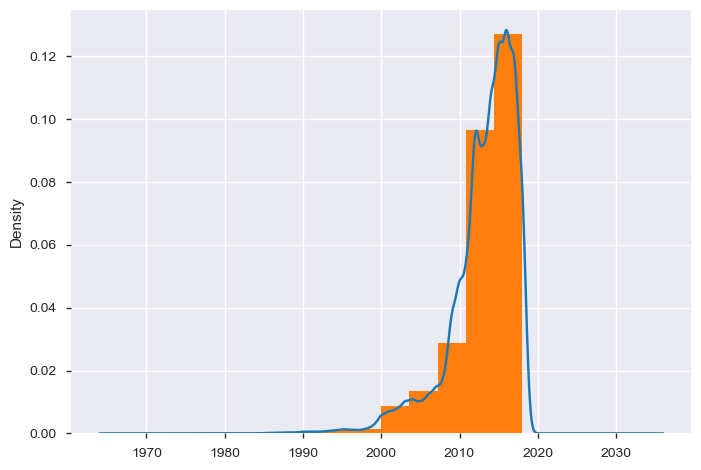

In [25]:
Staff.Year_of_recruitment.plot.kde()
Staff.Year_of_recruitment.hist(density=True)

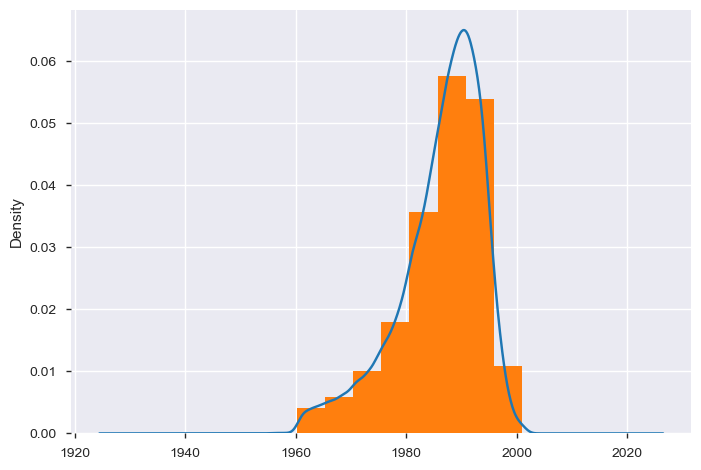

In [26]:
Staff.Year_of_birth.plot.kde()
Staff.Year_of_birth.hist(density=True)

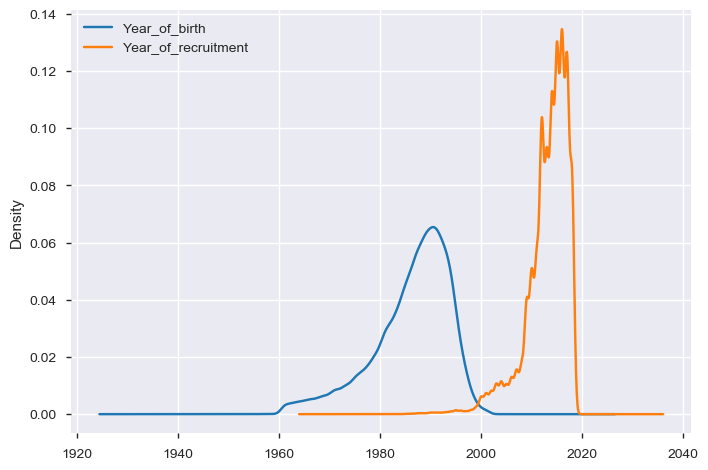

In [27]:
Staff[['Year_of_birth', 'Year_of_recruitment']].plot.kde(bw_method=0.1)

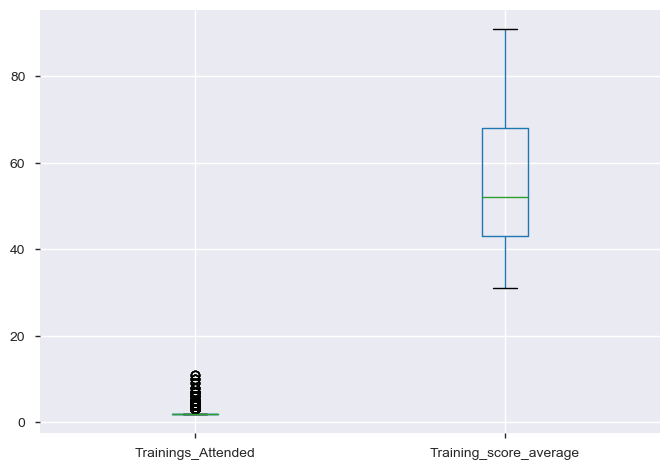

In [31]:
Staff_Numeric_Var.boxplot(column=['Trainings_Attended', 'Training_score_average'])

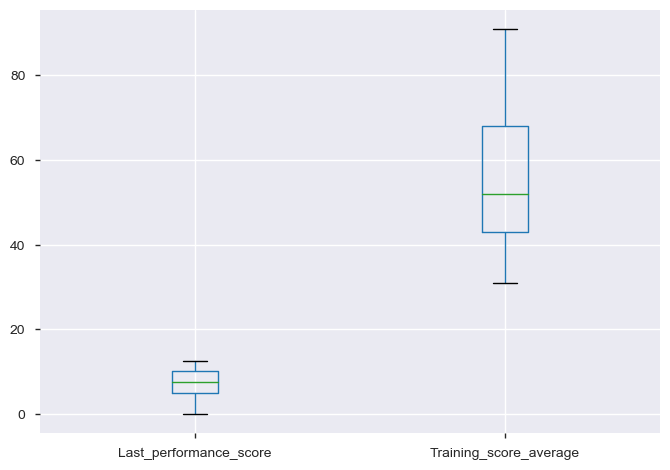

In [32]:
Staff.boxplot(column=['Last_performance_score', 'Training_score_average'])

## Missing Values

In [33]:
Staff.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
Foreign_schooled                          0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [ ]:
#Staff['Qualification'].fillna.mode()

#df = df.fillna(df.mode().iloc[0])

#df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [34]:
#Staff.fillna(Staff['Qualification'].mode(), inplace=True)
#Staff.tail()

Staff = Staff.fillna(Staff['Qualification'].value_counts().index[0])
Staff.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.50,2011,1,0,41,No,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.50,2015,0,0,52,Yes,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.50,2012,0,0,42,Yes,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.50,2009,0,0,42,Yes,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.50,2012,0,0,77,Yes,No,No,1,0


In [35]:
Staff.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
Foreign_schooled                       0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

## Feature Engineering and Encoding

### Gender Mapping

In [36]:
gender_mapping = ({'Female': 0, 'Male': 1})
Staff['Gender'] = Staff['Gender'].map(gender_mapping)
Staff.tail()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
38307,YAK/S/54802,Information Technology and Solution Support,First Degree or HND,0,Direct Internal process,2,1990,0.00,2018,0,0,70,Yes,No,No,0,0
38308,YAK/S/54805,Customer Support and Field Operations,"MSc, MBA and PhD",0,Agency and others,2,1984,5.00,2013,0,0,48,Yes,No,No,1,0
38309,YAK/S/54806,Information and Strategy,First Degree or HND,1,Agency and others,2,1994,12.50,2016,1,0,71,No,No,No,3,0
38310,YAK/S/54807,Commercial Sales and Marketing,First Degree or HND,1,Direct Internal process,2,1992,2.50,2017,0,0,37,Yes,No,No,1,0
38311,YAK/S/54808,People/HR Management,First Degree or HND,1,Agency and others,2,1994,2.50,2014,0,0,41,Yes,No,No,2,0


#### Creating New Features: Age, Duration_of_Employment (YEARS) and Employment_Age 

In [37]:
Staff['Age'] = 2019 - Staff['Year_of_birth']
Staff['Duration_of_Employment (YEARS)'] = 2019 - Staff['Year_of_recruitment']
Staff['Employment_Age'] = Staff['Year_of_recruitment'] - Staff['Year_of_birth']
Staff.tail()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,Duration_of_Employment (YEARS),Employment_Age
38307,YAK/S/54802,Information Technology and Solution Support,First Degree or HND,0,Direct Internal process,2,1990,0.00,2018,0,0,70,Yes,No,No,0,0,29,1,28
38308,YAK/S/54805,Customer Support and Field Operations,"MSc, MBA and PhD",0,Agency and others,2,1984,5.00,2013,0,0,48,Yes,No,No,1,0,35,6,29
38309,YAK/S/54806,Information and Strategy,First Degree or HND,1,Agency and others,2,1994,12.50,2016,1,0,71,No,No,No,3,0,25,3,22
38310,YAK/S/54807,Commercial Sales and Marketing,First Degree or HND,1,Direct Internal process,2,1992,2.50,2017,0,0,37,Yes,No,No,1,0,27,2,25
38311,YAK/S/54808,People/HR Management,First Degree or HND,1,Agency and others,2,1994,2.50,2014,0,0,41,Yes,No,No,2,0,25,5,20


#### Getting the Categorical Features from the Staff Data

In [38]:
Final_Categorical = Staff.drop(['EmployeeNo'], axis=1, inplace=True)
Final_Categorical = Staff.select_dtypes(include=['object'])
Final_Categorical.head()

,Division,Qualification,Channel_of_Recruitment,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Direct Internal process,No,No,No,0
1,Customer Support and Field Operations,First Degree or HND,Agency and others,Yes,No,No,0
2,Commercial Sales and Marketing,First Degree or HND,Direct Internal process,Yes,No,No,0
3,Commercial Sales and Marketing,First Degree or HND,Agency and others,Yes,No,No,1
4,Information and Strategy,First Degree or HND,Direct Internal process,Yes,No,No,1


#### Encoding the Categorical Features Using Dummies

In [39]:
Final_Categorical_Dummies = pd.get_dummies(Final_Categorical)
Final_Categorical_Dummies.head()

,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Qualification_First Degree or HND,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,Channel_of_Recruitment_Agency and others,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_No,Foreign_schooled_Yes,Past_Disciplinary_Action_No,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,No_of_previous_employers_0,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0


In [40]:
Final_Categorical_Dummies.shape

(38312, 28)

#### Getting the Numeric Features from the Staff Data

In [41]:
New_Numeric = (Staff.dtypes=='int64') | (Staff.dtypes=='int32') | (Staff.dtypes=='float64')
New_Numeric.values

array([False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True])

In [42]:
Final_Numeric = Staff.iloc[:, New_Numeric.values]
Final_Numeric = Final_Numeric.drop(['Year_of_birth', 'Year_of_recruitment'], axis = 1)
Final_Numeric.head()

,Gender,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age,Duration_of_Employment (YEARS),Employment_Age
0,0,2,12.50,1,0,41,0,33,8,25
1,1,2,12.50,0,0,52,0,28,4,24
2,1,2,7.50,0,0,42,0,32,7,25
3,1,3,2.50,0,0,42,0,37,10,27
4,1,3,7.50,0,0,77,0,29,7,22


In [43]:
Final_Numeric = Staff.iloc[:, New_Numeric.values]
Final_Numeric = Final_Numeric.drop(['Year_of_birth', 'Year_of_recruitment'], axis = 1)
Final_Numeric.head()

,Gender,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age,Duration_of_Employment (YEARS),Employment_Age
0,0,2,12.50,1,0,41,0,33,8,25
1,1,2,12.50,0,0,52,0,28,4,24
2,1,2,7.50,0,0,42,0,32,7,25
3,1,3,2.50,0,0,42,0,37,10,27
4,1,3,7.50,0,0,77,0,29,7,22


In [44]:
Final_Numeric.shape

(38312, 10)

In [45]:
Encoded_Data = pd.concat([Final_Categorical_Dummies, Final_Numeric], axis=1)
Encoded_Data.head()

,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Qualification_First Degree or HND,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,Channel_of_Recruitment_Agency and others,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Foreign_schooled_No,Foreign_schooled_Yes,Past_Disciplinary_Action_No,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,No_of_previous_employers_0,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5,Gender,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age,Duration_of_Employment (YEARS),Employment_Age
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,2,12.50,1,0,41,0,33,8,25
1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,2,12.50,0,0,52,0,28,4,24
2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,2,7.50,0,0,42,0,32,7,25
3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,3,2.50,0,0,42,0,37,10,27
4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,3,7.50,0,0,77,0,29,7,22


In [46]:
Encoded_Data.shape

(38312, 38)

## Checking for Imbalance on the Staff Dataset

In [47]:
Staff['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

### Percentage Distribution of the Imbalance on the Staff Dataset

In [48]:
print('NOT PROMOTED, 0 Represents', round(Staff['Promoted_or_Not'].value_counts()[0]/len(Staff) * 100,2), '% of the Train Set')
print('PROMOTED, 1 Represents', round(Staff['Promoted_or_Not'].value_counts()[1]/len(Staff) * 100,2), '% of the Train Set')

NOT PROMOTED, 0 Represents 91.54 % of the Train Set
PROMOTED, 1 Represents 8.46 % of the Train Set


Text(0.5, 1.0, 'Promotion Imbalance \n Percentage Distribution \n \n (0: Not Promoted || 1: Promoted)')

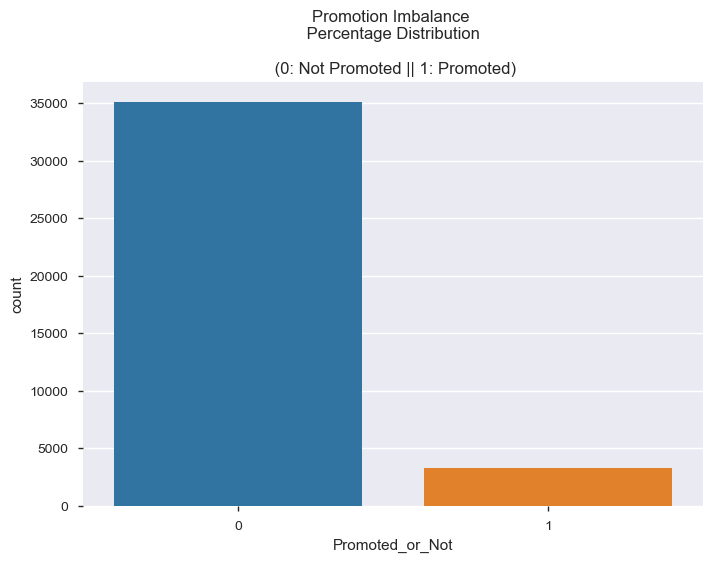

In [49]:
# Distribution Plot of The Imbalance on the Dataset
sns.countplot('Promoted_or_Not', data=Staff)
plt.title('Promotion Imbalance \n Percentage Distribution \n \n (0: Not Promoted || 1: Promoted)', fontsize=12)

The majority class, Not Promoted (0) = 91.54%.
The minority class, Promoted (1) = 8.46%.
This indicates that the Train dataset is heavily imbalanced, and as a result the model might suffer from underfitting.

To fix this, the  $Synthetic$   $Minority$   $Over-sampling$    $Technique$   $(SMOTE)$ would be used to balance the Train Data

## Solving the Imbalance Problem Using SMOTE

### Creating the Target and Predictor Variables

In [59]:
X = Encoded_Data
Y = Encoded_Data['Promoted_or_Not']

X.shape, Y.shape

((38312, 38), (38312,))

## Splitting the Encoded_Features Dataset into Train and Test Sets

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [78]:
# importing SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# applying SMOTE to our data and checking the class counts
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print(sorted(Counter(y_resampled).items()))

[(0, 35071), (1, 35071)]


In [79]:
# Checking if the train and test labels are evenly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.91601684 0.08398316]
[0.91295837 0.08704163]


In [63]:
# Machine Learning
from sklearn import svm  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.svm import LinearSVC, SVC, SVR
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from scipy.stats import skew
from sklearn.model_selection import validation_curve, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb

# roc curve and auc score
from sklearn.metrics import roc_curve,roc_auc_score,auc

### Predictions

In [64]:
def Display_Scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), 
                                                            np.std(scores)))

###  Hyperparameter Tuning

In [66]:
# using PCA and XGBoosting Classifier 
pipeline = Pipeline([('Scaling', StandardScaler()), ('pca', PCA(random_state = 42, )), 
                     ('boosting', XGBClassifier(objective="binary:logistic", 
                                               reg_alpha=0.01, random_state=42, 
                                               eval_metric=["auc", "error",'logloss',"error@0.6"]))])

# Getting Parameters for the grid

param_grid = {
    'pca__n_components':[5, 10, 15, 20, 25],
    'boosting__learning_rate':[0.0001, 0.001, 0.01, 0.1],
    'boosting__n_estimators':[100, 150]
}

In [67]:
Random = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5)
Random.fit(X, Y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('Scaling',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=None,
                                                  random_state=42,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('boosting',
                                              XGBClassifier(base_score=0.5,
      

In [80]:
means = Random.cv_results_['mean_test_score']
stds = Random.cv_results_['std_test_score']
params = Random.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.984992 (0.001287) with: {'pca__n_components': 15, 'boosting__n_estimators': 100, 'boosting__learning_rate': 0.1}
0.931014 (0.001927) with: {'pca__n_components': 5, 'boosting__n_estimators': 150, 'boosting__learning_rate': 0.01}
0.957220 (0.001968) with: {'pca__n_components': 20, 'boosting__n_estimators': 100, 'boosting__learning_rate': 0.0001}
0.946857 (0.002994) with: {'pca__n_components': 10, 'boosting__n_estimators': 150, 'boosting__learning_rate': 0.001}
0.930048 (0.001893) with: {'pca__n_components': 5, 'boosting__n_estimators': 100, 'boosting__learning_rate': 0.0001}
0.962884 (0.001237) with: {'pca__n_components': 15, 'boosting__n_estimators': 100, 'boosting__learning_rate': 0.01}
0.951190 (0.003153) with: {'pca__n_components': 10, 'boosting__n_estimators': 100, 'boosting__learning_rate': 0.01}
0.987706 (0.000843) with: {'pca__n_components': 20, 'boosting__n_estimators': 100, 'boosting__learning_rate': 0.1}
0.957846 (0.001857) with: {'pca__n_components': 20, 'boosting__n_estima

In [81]:
print("Best: %f using %s" % (Random.best_score_, 
    Random.best_params_))

Best: 0.987706 using {'pca__n_components': 20, 'boosting__n_estimators': 100, 'boosting__learning_rate': 0.1}


## Fitting The Models

### Fitting with Binary Logistic Regression

In [82]:
lr = LogisticRegression(random_state=42, solver ='saga', tol= 0.9)
lr = lr.fit(X_resampled, Y_resampled)
pred_y = lr.predict(X_test)

# How is our Accuracy level?
print(np.unique(pred_y))
print("Accuracy: %.2f%%" % accuracy_score(y_test, pred_y))
print(classification_report(y_test, pred_y))

# Confusion Matrix
conf_mat = confusion_matrix(y_true = y_test, y_pred = pred_y)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(lr, x_resampled, y_resampled, cv = 5))

[0 1]
Accuracy: 1.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6996
           1       1.00      1.00      1.00       667

    accuracy                           1.00      7663
   macro avg       1.00      1.00      1.00      7663
weighted avg       1.00      1.00      1.00      7663

Confusion matrix:
 [[6996    0]
 [   0  667]]
Cross_Val_Score : [0.99871703 0.99750499 0.99657827 0.99636441 0.99807528]


In [83]:
scores = cross_val_score(lr, X_resampled, Y_resampled, 
                         scoring="neg_mean_squared_error", cv=5)

Display_Scores(np.sqrt(-scores))

Scores: [0.047758   0.02924777 0.04136259 0.02669944 0.03680264]
Mean: 0.036
Std: 0.008


### Fitting with Support Vector Machine (SVM)

In [90]:
# Building a basic SVM model using the SVC method
supportvector = SVC(random_state=42, decision_function_shape='ovr', probability=False, 
                    gamma='scale', kernel='sigmoid')
supportvector.fit(X_resampled, Y_resampled)
s_predict = supportvector.predict(X_test)

# How is our Accuracy Level?
print(np.unique(s_predict))
print("Accuracy: %.2f%%" % accuracy_score(y_test, s_predict))
print(classification_report(y_test , s_predict))

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=s_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(supportvector,X_resampled,Y_resampled, cv=5))

[0 1]
Accuracy: 0.43%
              precision    recall  f1-score   support

           0       0.89      0.43      0.58      6996
           1       0.07      0.42      0.11       667

    accuracy                           0.43      7663
   macro avg       0.48      0.42      0.35      7663
weighted avg       0.81      0.43      0.54      7663

Confusion matrix:
 [[3010 3986]
 [ 388  279]]
Cross_Val_Score : [0.43228795 0.429712   0.42543484 0.4261477  0.43028229]


In [ ]:
scores = cross_val_score(supportvector, X_resampled, Y_resampled, 
                         scoring="neg_mean_squared_error", cv=5)

Display_Scores(np.sqrt(-scores))

### Fitting with Decision Tree Classifier

In [84]:
# Implementing a basic decision tree using DecisionTreeClassifier method
decisionTree = DecisionTreeClassifier(random_state=42,splitter='random', max_depth=9,
                                      criterion='gini', max_features='auto')
decisionTree = decisionTree.fit(X_resampled, Y_resampled)
dtc_predict = decisionTree.predict(X_test)

# What is our Accuracy Level?
print(np.unique(dtc_predict))
print("Accuracy: %.2f%%" % accuracy_score(y_test, dtc_predict))
print(classification_report(y_test, dtc_predict))

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=dtc_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(decisionTree,X_resampled,Y_resampled, cv=5))

[0 1]
Accuracy: 0.89%
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6996
           1       0.43      0.75      0.55       667

    accuracy                           0.89      7663
   macro avg       0.70      0.83      0.74      7663
weighted avg       0.93      0.89      0.90      7663

Confusion matrix:
 [[6337  659]
 [ 166  501]]
Cross_Val_Score : [0.8230221  0.9831765  0.99992871 0.91766467 0.89827488]


In [85]:
scores = cross_val_score(decisionTree, X_resampled, Y_resampled, 
                         scoring="neg_mean_squared_error", cv=5)

Display_Scores(np.sqrt(-scores))

Scores: [0.42068742 0.12970542 0.0084431  0.28694133 0.31894376]
Mean: 0.233
Std: 0.146


### Fitting with Random Forest Classifier

In [86]:
# Building a basic random forest using the RandomForestClassifier method
randomforest = RandomForestClassifier(random_state=42, n_estimators=1000, 
                                      criterion= 'gini', oob_score=True)
randomforest.fit(X_resampled, Y_resampled)
rfc_predict = randomforest.predict(X_test)

# What is our Accuracy Level?
print(np.unique(rfc_predict))
print("Accuracy: %.2f%%" % accuracy_score(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict))

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=rfc_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(randomforest,X_resampled,Y_resampled, cv=5))

[0 1]
Accuracy: 1.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6996
           1       1.00      1.00      1.00       667

    accuracy                           1.00      7663
   macro avg       1.00      1.00      1.00      7663
weighted avg       1.00      1.00      1.00      7663

Confusion matrix:
 [[6996    0]
 [   0  667]]
Cross_Val_Score : [1. 1. 1. 1. 1.]


In [87]:
scores = cross_val_score(randomforest, X_resampled, Y_resampled, 
                         scoring="neg_mean_squared_error", cv=5)

Display_Scores(np.sqrt(-scores))

Scores: [0. 0. 0. 0. 0.]
Mean: 0.000
Std: 0.000


### Fitting with XgBoost Classifier

In [88]:
# fit XgBoost model on training data
xgb_model = XGBClassifier(objective="binary:logistic", reg_alpha=0.01, 
                          random_state=42, learning_rate=0.1, n_estimators=200,
                          eval_metric=["auc", "error",'logloss',"error@0.6"])

xgb_model.fit(X_resampled, Y_resampled, early_stopping_rounds=10, 
              eval_set=[(X_resampled, Y_resampled),(X_test.values, y_test.values)], 
              verbose=False)

# make predictions for test data
y_predict = xgb_model.predict(X_test.values)

# evaluate predictions and Printing the Accuracy Level
print(np.unique(y_predict))
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
classification = classification_report(y_test, y_predict)
print(classification)

# Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predict)
print('Confusion matrix:\n', conf_mat)

# Cross Validation Score
print('Cross_Val_Score :', cross_val_score(xgb_model,X_resampled,Y_resampled, cv=5))

[0 1]
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6996
           1       1.00      1.00      1.00       667

    accuracy                           1.00      7663
   macro avg       1.00      1.00      1.00      7663
weighted avg       1.00      1.00      1.00      7663

Confusion matrix:
 [[6996    0]
 [   0  667]]
Cross_Val_Score : [1. 1. 1. 1. 1.]


In [89]:
scores = cross_val_score(xgb_model, X_resampled, Y_resampled, 
                         scoring="neg_mean_squared_error", cv=5)

Display_Scores(np.sqrt(-scores))

print("best score: {0},\n best iteration: {1},\n best ntree limit {2}".format(xgb_model.best_score, 
      xgb_model.best_iteration, xgb_model.best_ntree_limit))

Scores: [0. 0. 0. 0. 0.]
Mean: 0.000
Std: 0.000
best score: 0.0,
 best iteration: 2,
 best ntree limit 3


## ROC Curve for the All Five Models

In [92]:
# Computing ROC curve and ROC area for all five Models
# For Logistic Regression
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test.values, pred_y)
lr_roc_auc = auc(lr_fpr, lr_tpr)

# For Support Vector Machine
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test.values, s_predict)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# For Random Forest Classifier
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test.values, rfc_predict)
rfc_roc_auc = auc(rfc_fpr, rfc_tpr)

# For Decision Tree Classifier
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test.values, dtc_predict)
dtc_roc_auc = auc(dtc_fpr, dtc_tpr)

# For XGBoost Classifier
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test.values, y_predict)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

In [93]:
# The ROC_auc Score
ROC_Score = roc_auc_score(y_test, y_predict)
ROC_Score

1.0

#### Plotting the ROC Curve

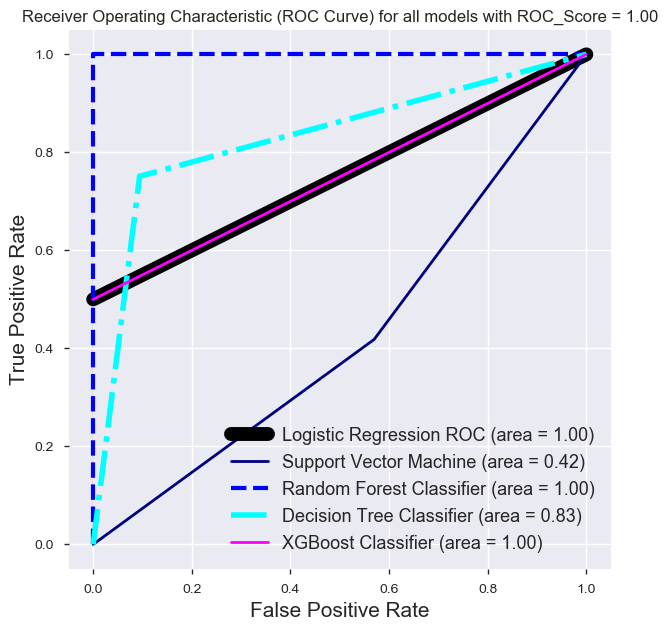

In [114]:
plt.figure(figsize=(7,7))
sns.lineplot(lr_fpr, lr_tpr, color = 'black',
         label='Logistic Regression ROC (area = %0.2f)'%lr_roc_auc, linewidth=10,linestyle='-')
sns.lineplot(svm_fpr,svm_tpr, color = 'navy', 
         label='Support Vector Machine (area = %0.2f)'%svm_roc_auc, linewidth=2,linestyle=':')
plt.plot(rfc_fpr,rfc_tpr, color = 'blue', 
         label='Random Forest Classifier (area = %0.2f)'%rfc_roc_auc, linewidth=3,linestyle='--')
plt.plot(dtc_fpr,dtc_tpr, color = 'cyan', 
         label='Decision Tree Classifier (area = %0.2f)'%dtc_roc_auc, linewidth=4,linestyle='-.')
sns.lineplot(xgb_fpr,xgb_tpr, color = 'magenta', 
         label='XGBoost Classifier (area = %0.2f)'%xgb_roc_auc, linewidth=2, linestyle='dotted')
plt.legend(prop = {'size':13},loc='best')
plt.title('Receiver Operating Characteristic (ROC Curve) for all models with ROC_Score = %0.2f'%ROC_Score)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.show()

## Maximum Hard Voting Ensemble for all five Models

In [123]:
from sklearn.ensemble import VotingClassifier
voting_clf_hard = VotingClassifier(
estimators = [('logistic', lr), ('Decision Tree', decisionTree), ('Random Forest', randomforest), ('SVM', supportvector), ('XGB', xgb_model)],
voting = 'hard')

voting_clf_soft = VotingClassifier(
estimators = [('logistic', lr), ('Decision Tree', decisionTree), ('Random Forest', randomforest), ('SVM', supportvector), ('XGB', xgb_model)],
voting = 'soft')

voting_clf_weighted = VotingClassifier(
estimators = [('logistic', lr), ('Decision Tree', decisionTree), ('Random Forest', randomforest), ('SVM', supportvector), ('XGB', xgb_model)],
voting = 'hard', weights=[2,1,2,2,3]).fit(X_train, y_train)

### Using the F1 Score to determine the best Models

In [124]:
from sklearn import model_selection
from sklearn import metrics
labels = ['Logistic Regression' 'Decision Tree', 'Random Forest', 'Support Vector', 'XGBoost','Hard Voting Ensemble']
for (clf, label) in zip([lr, decisionTree, randomforest, supportvector, xgb_model, voting_clf_hard, voting_clf_soft, voting_clf_weighted], labels):
    
    scores = model_selection.cross_val_score(clf, X_train, y_train,
                                            cv=5,
                                            scoring=metrics.make_scorer(metrics.scorer.f1_score, average='macro'))
    print('F1 Score: %0.2f [%s]'
         % (scores.mean(), label))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score: 0.48 [Logistic RegressionDecision Tree]
F1 Score: 0.97 [Random Forest]
F1 Score: 1.00 [Support Vector]
F1 Score: 0.48 [XGBoost]
F1 Score: 1.00 [Hard Voting Ensemble]


## From the above outcome, using the F1 Score, the best model is Support Vector Machine (SVM) at 100%